In [ ]:

for h in hydrophones:
    for gridpoint in grid:
        # dvec = zeros(length(gdpks), 1); # each grid point
        dvec = picks(gdpks) - tabtm(gdpks); # picks -> time since beginning of hour # tabtm -> travel times
        # wmat = zeros(length(gdpks), length(gdpks)); # wmat -> weighting matrix n x m : n = number of instruments
        wmat = diag(uncer(gdpks)); # you pick the uncertainty you want
        gvec = ones(length(gdpks), 1); # 1s for all the good picks
        t0 = (gvec' * wmat * gvec) \ (gvec' * wmat * dvec); # t0 -> origin time gvec.transpose()*wmat*gvec \ gvec.transpose()*wmat*dvec
# https://stackoverflow.com/questions/7160162/left-matrix-division-and-numpy-solve

        evec = zeros(length(gdpks), 1); # ERROR VECTOR
        evec = dvec - gvec * t0; # calculate the error
        rmsi(gdpks) = evec; # rmsi -> rms for each station
        rms=sqrt((evec' * wmat * evec) / sum(diag(wmat))); # make single rms per event


In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install xarray

You should consider upgrading via the '/home/john/anaconda3/envs/borehole/bin/python3.8 -m pip install --upgrade pip' command.


In [3]:
import xarray

In [4]:
# in hundreds of meters
x = np.arange(-2, 3, 1)*100
y = np.arange(-2, 3, 1)*100
z = np.arange(-2, 3, 1)*100

xx, yy, zz = np.meshgrid(x, y, z)

In [5]:
zz

array([[[-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200]],

       [[-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200]],

       [[-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200]],

       [[-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200]],

       [[-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,  200],
        [-200, -100,    0,  100,

In [6]:
travel_times = np.zeros_like(xx)
travel_times

array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]])

In [7]:
velocity_model = 6000 #m/s

In [8]:
C = np.sqrt(xx**2 + yy**2 + zz**2)
C

array([[[346.41016151, 300.        , 282.84271247, 300.        ,
         346.41016151],
        [300.        , 244.94897428, 223.60679775, 244.94897428,
         300.        ],
        [282.84271247, 223.60679775, 200.        , 223.60679775,
         282.84271247],
        [300.        , 244.94897428, 223.60679775, 244.94897428,
         300.        ],
        [346.41016151, 300.        , 282.84271247, 300.        ,
         346.41016151]],

       [[300.        , 244.94897428, 223.60679775, 244.94897428,
         300.        ],
        [244.94897428, 173.20508076, 141.42135624, 173.20508076,
         244.94897428],
        [223.60679775, 141.42135624, 100.        , 141.42135624,
         223.60679775],
        [244.94897428, 173.20508076, 141.42135624, 173.20508076,
         244.94897428],
        [300.        , 244.94897428, 223.60679775, 244.94897428,
         300.        ]],

       [[282.84271247, 223.60679775, 200.        , 223.60679775,
         282.84271247],
        [223.6067

In [9]:
C/velocity_model

array([[[0.05773503, 0.05      , 0.04714045, 0.05      , 0.05773503],
        [0.05      , 0.04082483, 0.0372678 , 0.04082483, 0.05      ],
        [0.04714045, 0.0372678 , 0.03333333, 0.0372678 , 0.04714045],
        [0.05      , 0.04082483, 0.0372678 , 0.04082483, 0.05      ],
        [0.05773503, 0.05      , 0.04714045, 0.05      , 0.05773503]],

       [[0.05      , 0.04082483, 0.0372678 , 0.04082483, 0.05      ],
        [0.04082483, 0.02886751, 0.02357023, 0.02886751, 0.04082483],
        [0.0372678 , 0.02357023, 0.01666667, 0.02357023, 0.0372678 ],
        [0.04082483, 0.02886751, 0.02357023, 0.02886751, 0.04082483],
        [0.05      , 0.04082483, 0.0372678 , 0.04082483, 0.05      ]],

       [[0.04714045, 0.0372678 , 0.03333333, 0.0372678 , 0.04714045],
        [0.0372678 , 0.02357023, 0.01666667, 0.02357023, 0.0372678 ],
        [0.03333333, 0.01666667, 0.        , 0.01666667, 0.03333333],
        [0.0372678 , 0.02357023, 0.01666667, 0.02357023, 0.0372678 ],
        [0.04714

In [10]:
np.zeros_like(yy)+(-200)

array([[[-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200]],

       [[-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200]],

       [[-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200]],

       [[-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200]],

       [[-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200],
        [-200, -200, -200, -200, -200],
        [-200, -200, -200, -200,

In [11]:
np.unique(yy)

array([-200, -100,    0,  100,  200])

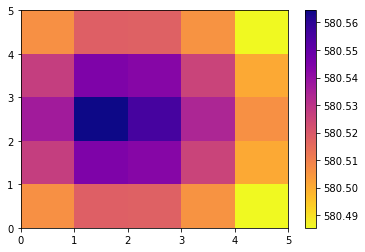

In [51]:
yy_1 = -100
yy_2 = -100

yy1_dw = np.sqrt(xx**2 + (yy - yy_1)**2 + zz**2)

yy2_dw = np.sqrt(xx**2 + (yy - yy_2)**2 + zz**2)

# wmat = zeros(length(gdpks), length(gdpks)); # wmat -> weighting matrix n x m : n = number of instruments
# wmat = diag(uncer(gdpks)); # you pick the uncertainty you want
wmat = np.zeros([100, 100])

t0_1 = yy1_dw/velocity_model

arrival_from_hour_start = (pd.to_datetime('08:05:18.033') - pd.to_datetime('08:00:00')).seconds
evec = (arrival_from_hour_start - t0_1)
wmat = [0.1, 0.1, 0.1] # 100 ms
plt.pcolormesh(np.sqrt((evec.transpose() * evec)/np.sum(wmat))[2], cmap='plasma_r')
plt.colorbar()

In [19]:
np.__version__
import matplotlib.pyplot as plt

In [14]:
!pip install numpy --upgrade

You should consider upgrading via the '/home/john/anaconda3/envs/borehole/bin/python3.8 -m pip install --upgrade pip' command.


In [15]:
wmat = np.zeros([100, 100])
wmat = wmat + 0.1
np.diag(wmat)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [16]:
def calc_dx()

def calc_travel_time(dx, vp)
    return dx / vp

SyntaxError: invalid syntax (2327918895.py, line 1)

In [44]:
np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) * np.diag(np.array([3, 2, 1]))

array([[ 3,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]])